In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

In [7]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [8]:
for col in cols_with_zero:
    df[col].fillna(df[col].median(), inplace=True)

/var/folders/9n/ct9mzlhs6kgc3p1sq06tl5y00000gn/T/ipykernel_88338/2982786776.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/var/folders/9n/ct9mzlhs6kgc3p1sq06tl5y00000gn/T/ipykernel_88338/2982786776.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

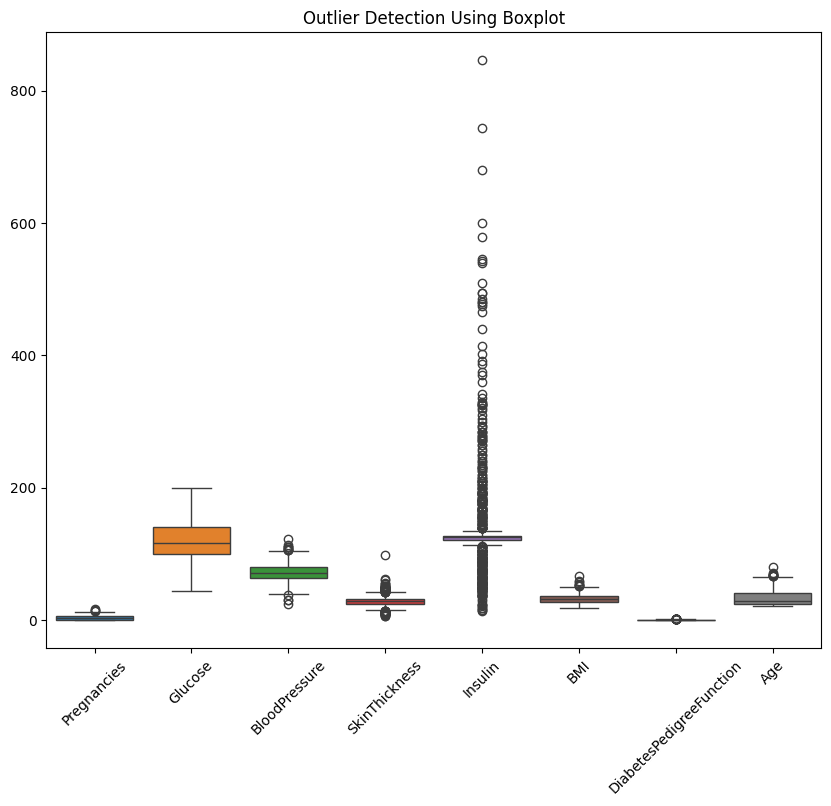

In [12]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df.drop(columns='Outcome'))
plt.xticks(rotation=45)
plt.title("Outlier Detection Using Boxplot")
plt.show()

In [13]:
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower, upper)

for col in df.columns[:-1]:
    cap_outliers(df, col)

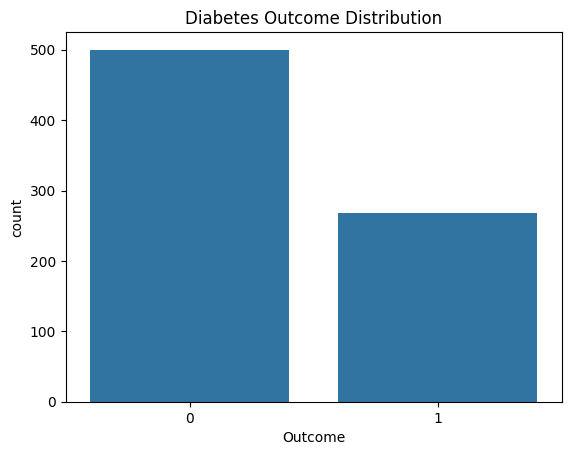

In [14]:
sns.countplot(x='Outcome', data=df)
plt.title("Diabetes Outcome Distribution")
plt.show()

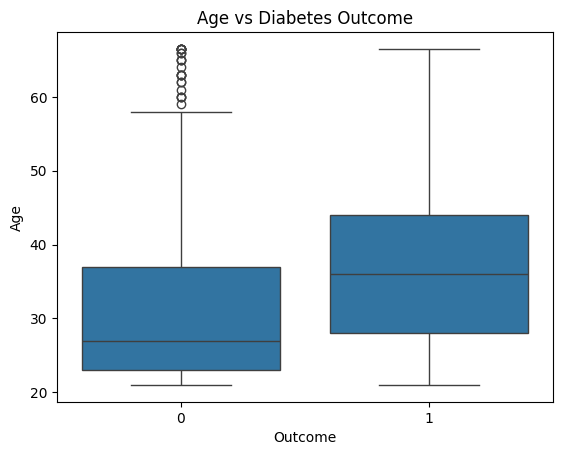

In [28]:
sns.boxplot(x='Outcome', y='Age', data=df)
plt.title("Age vs Diabetes Outcome")
plt.show()

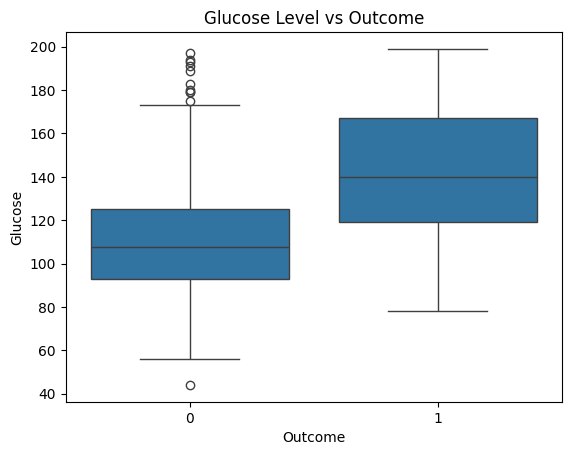

In [16]:
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title("Glucose Level vs Outcome")
plt.show()

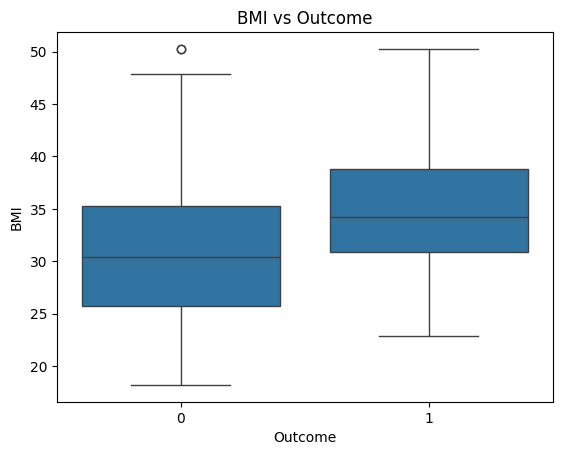

In [24]:
sns.boxplot(x='Outcome', y='BMI', data=df)
plt.title("BMI vs Outcome")
plt.show()

### EDA Insights
Diabetic patients have higher glucose levels

Age tends to be higher in diabetic class

BMI is moderately higher for diabetics

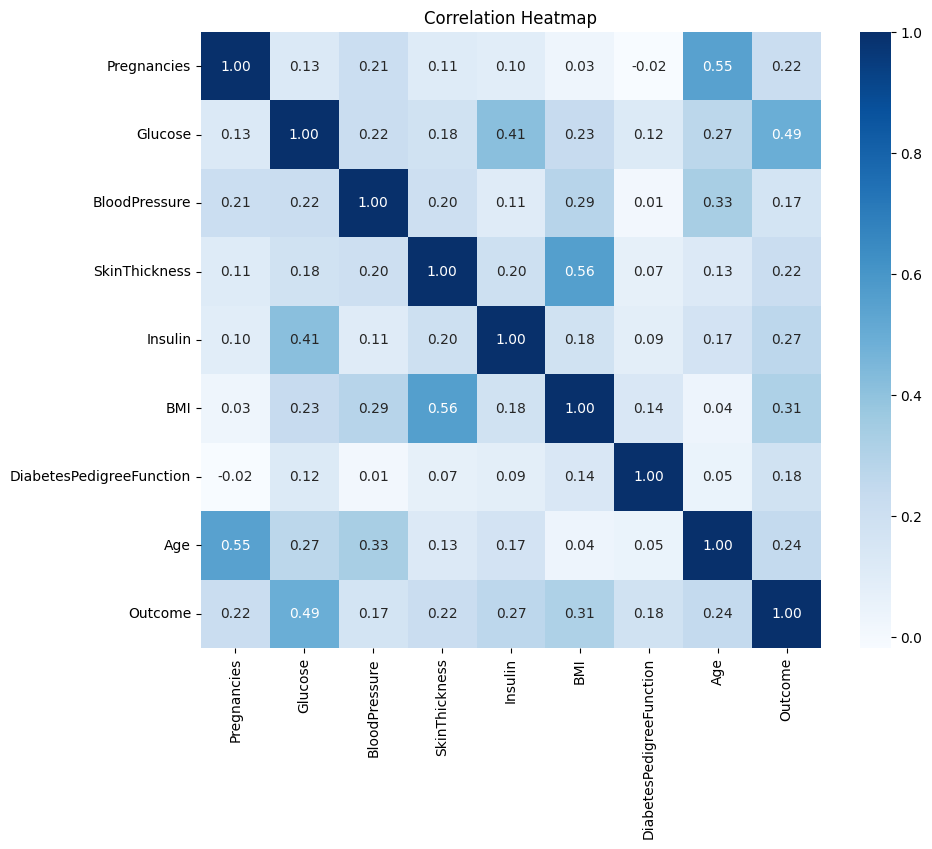

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Key Correlation Insights
Glucose → strongest correlation with Outcome

BMI and Age show moderate correlation

DiabetesPedigreeFunction has a weak but relevant relationship

In [19]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Glucose – 0.49 – Moderate positive correlation

BMI – 0.31 – Weak to moderate positive correlation

Insulin – 0.27 – Weak positive correlation

Age – 0.24 – Weak positive correlation

Pregnancies – 0.22 – Weak positive correlation

SkinThickness – 0.22 – Weak positive correlation

BloodPressure – 0.17 – Very weak correlation

DiabetesPedigreeFunction – 0.18 – Very weak correlation

Blood Pressure (BP) – min. 90/60, max. 180/120

Glucose (Fasting / Random) – min. 126 mg/dL, max. 300 mg/dL

Skin Thickness – min. 5 mm, max. 50 mm

Insulin – min. 0 µU/ml, max. 900 µU/ml

BMI – min. 18.5 kg/m², max. 70 kg/m²

Diabetes Pedigree Function – min. 0.08, max. 2.5

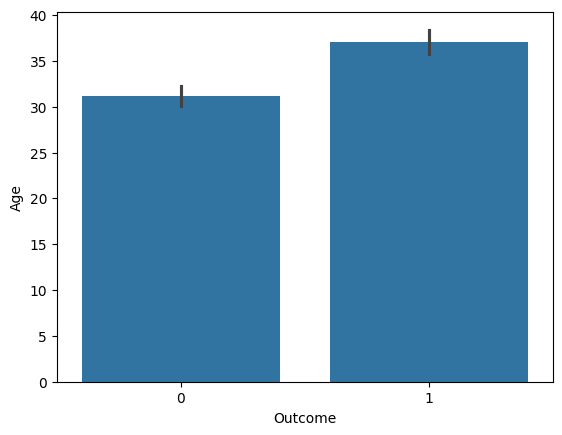

In [30]:
sns.barplot(x = 'Outcome', y = 'Age', data=df)
plt.show()

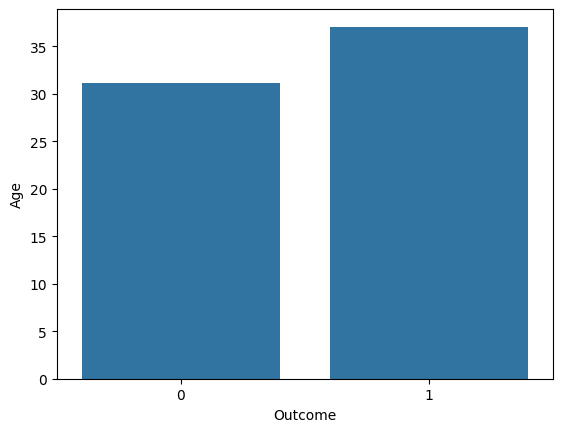

In [32]:
grouped_df = df.groupby('Outcome')['Age'].mean().reset_index()
sns.barplot(x = 'Outcome', y = 'Age', data=grouped_df)
plt.show()

In [33]:
df['Age'].groupby(df['Outcome']).std()

Outcome
0    11.477227
1    10.925826
Name: Age, dtype: float64

In [34]:
df['Age'].groupby(df['Outcome']).mean()

Outcome
0    31.135000
1    37.052239
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Outcome'>

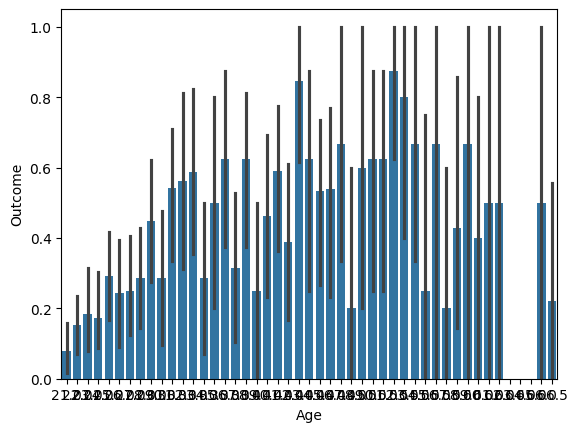

In [42]:
sns.barplot(x=df['Age'], y=df['Outcome'], estimator='mean')

<Axes: xlabel='Age'>

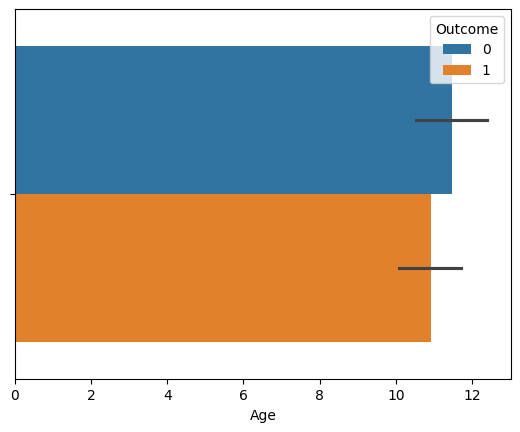

In [40]:
sns.barplot(x=df['Age'], hue=df['Outcome'], estimator='std')

<Axes: xlabel='Age', ylabel='Count'>

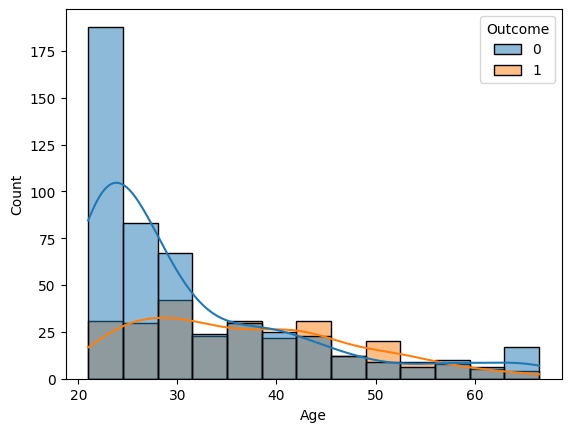

In [44]:
sns.histplot(x='Age', hue='Outcome', data = df, kde=True)

In [46]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: xlabel='BMI', ylabel='Outcome'>

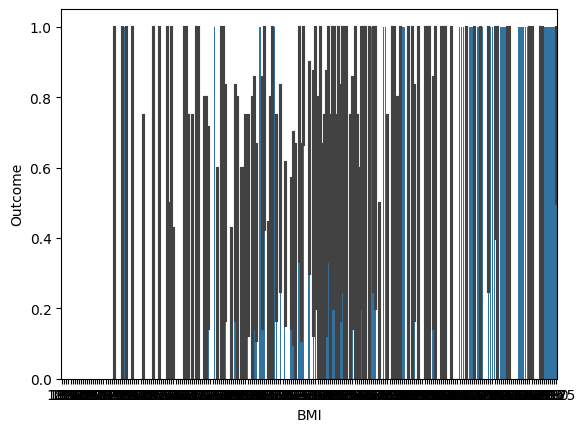

In [53]:
sns.barplot(x=df['BMI'], y=df['Outcome'], estimator='mean')

<Axes: xlabel='BMI'>

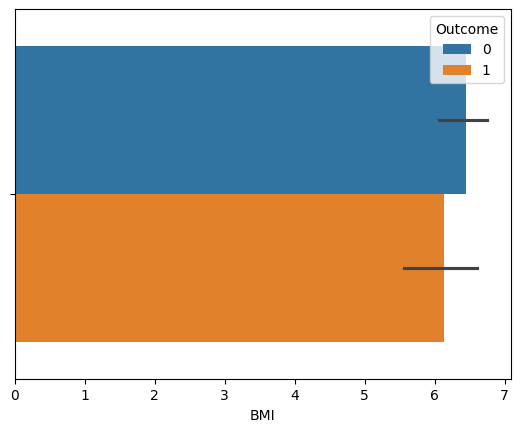

In [50]:
sns.barplot(x=df['BMI'], hue=df['Outcome'], estimator='std')

<Axes: xlabel='BMI', ylabel='Count'>

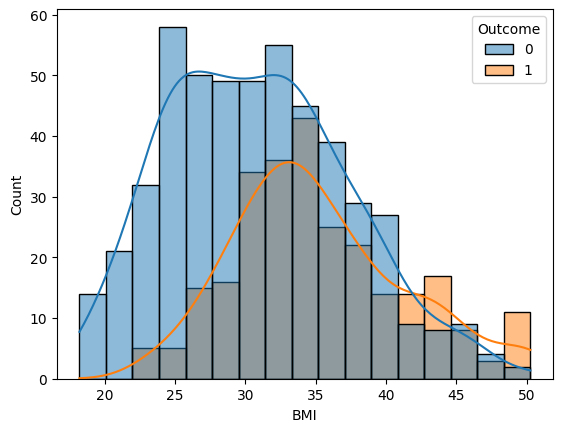

In [51]:
sns.histplot(x='BMI', hue='Outcome', data = df, kde=True)

In [54]:
die_age = df['Age'][df['Outcome']==1]
nondie_age=df['Age'][df['Outcome']==0]

from scipy.stats import ttest_ind
stat, P = ttest_ind(die_age, nondie_age)
alpha = 0.05
if P<alpha:
    print ('Reject H0')
else:
    print ('Accept H0')

Reject H0


In [57]:
cols = ["Age","Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI","DiabetesPedigreeFunction"]
for col in cols:
  die_age=df[col][df['Outcome'] == 1]
  nondie_age=df[col][df['Outcome'] == 0]

  from scipy.stats import ttest_ind

  stat, p = ttest_ind(die_age, nondie_age)

  alpha = 0.05
  if p<alpha:
    print(col,' : Reject H0')
  else:
    print(col,' : Accept H0')

Age  : Reject H0
Glucose  : Reject H0
BloodPressure  : Reject H0
SkinThickness  : Reject H0
Insulin  : Reject H0
BMI  : Reject H0
DiabetesPedigreeFunction  : Reject H0


#### Insights: 
Rejecting H0 --> significantly different from each other, and this particular column effect the outcome column

1. The mean age of diabetic and non-diabetic people is dissimilar i.e significant difference present.
Age of the person influences Diabetes.

2. The mean bmi of diabetic and non-diabetic people is dissimilar i.e significant difference present.
BMI influences Diabetes.

3. The mean insulin of diabetic and non-diabetic people is dissimilar i.e significant difference present.
Insulin influences Diabetes.

4. The mean glucose of diabetic and non-diabetic people is dissimilar i.e significant difference present.
Glucose level influences Diabetes.

5. The mean skinthickness of diabetic and non-diabetic people is dissimilar i.e significant difference present.
Skinthickness influences Diabetes.

6. The mean bp of diabetic and non-diabetic people is dissimilar i.e significant difference present.
Blood Pressure influences Diabetes.

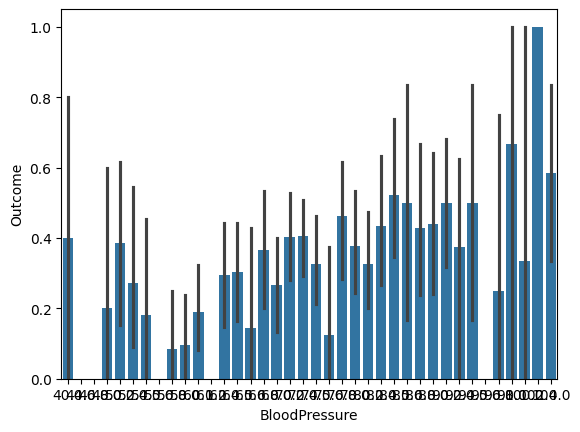

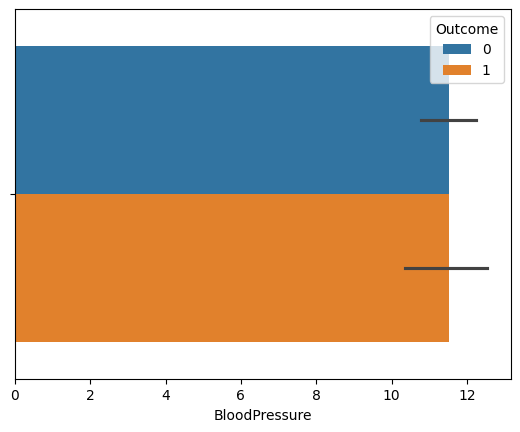

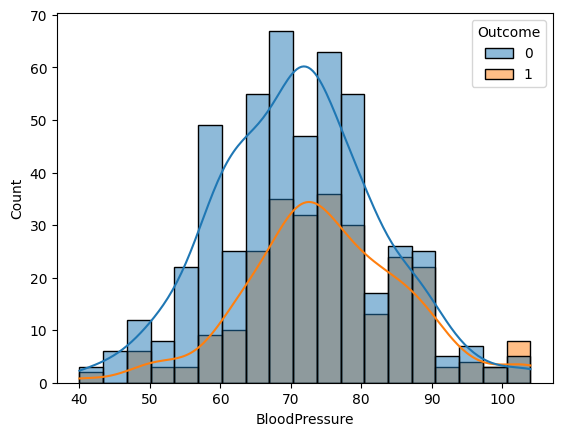

In [63]:
sns.barplot(x=df['BloodPressure'], y=df['Outcome'], estimator='mean')
plt.show()
sns.barplot(x=df['BloodPressure'], hue=df['Outcome'], estimator='std')
plt.show()
sns.histplot(x='BloodPressure', hue='Outcome', data = df, kde=True)
plt.show()

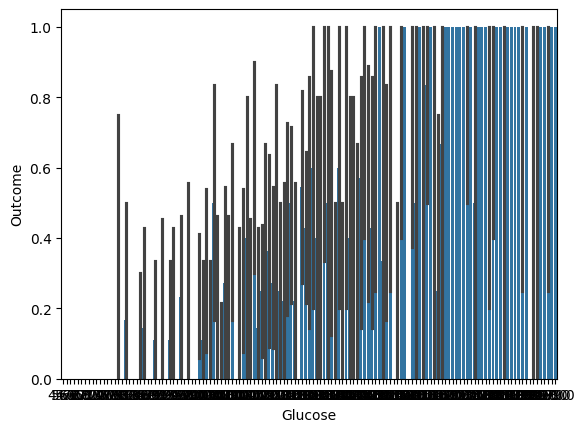

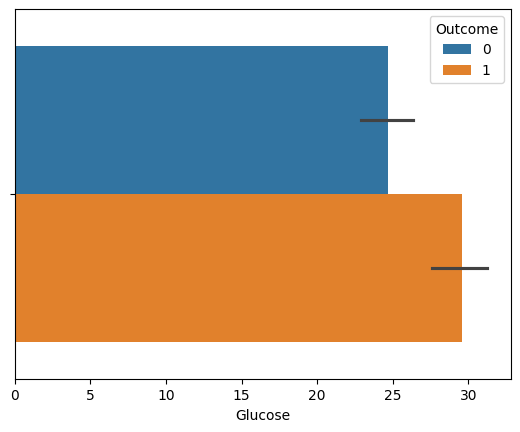

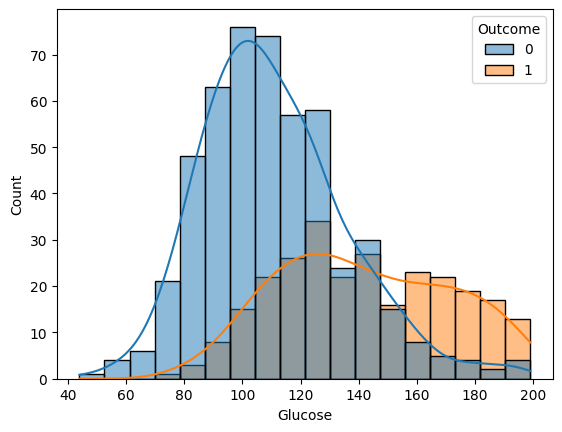

In [64]:
sns.barplot(x=df['Glucose'], y=df['Outcome'], estimator='mean')
plt.show()
sns.barplot(x=df['Glucose'], hue=df['Outcome'], estimator='std')
plt.show()
sns.histplot(x='Glucose', hue='Outcome', data = df, kde=True)
plt.show()

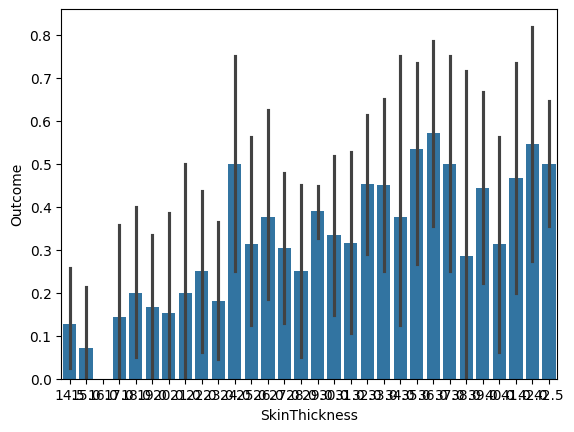

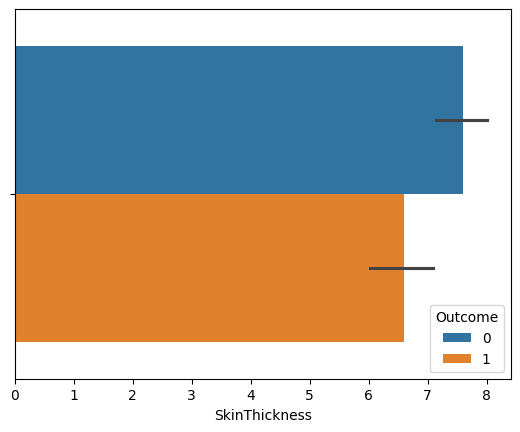

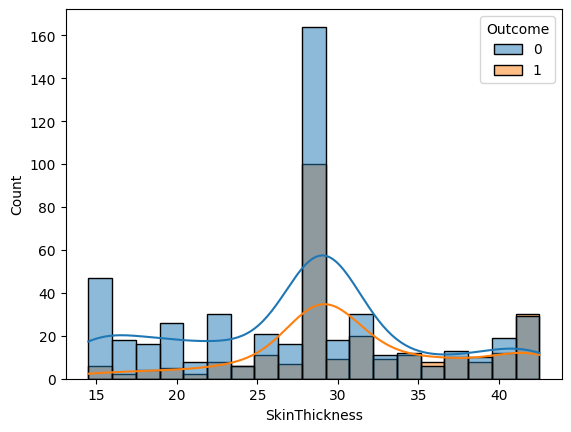

In [66]:
sns.barplot(x=df['SkinThickness'], y=df['Outcome'], estimator='mean')
plt.show()
sns.barplot(x=df['SkinThickness'], hue=df['Outcome'], estimator='std')
plt.show()
sns.histplot(x='SkinThickness', hue='Outcome', data = df, kde=True)
plt.show()

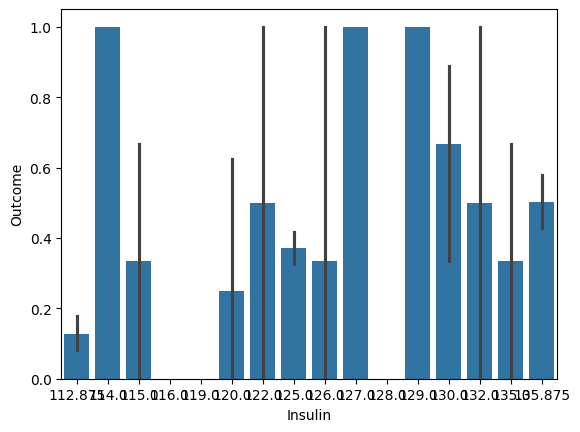

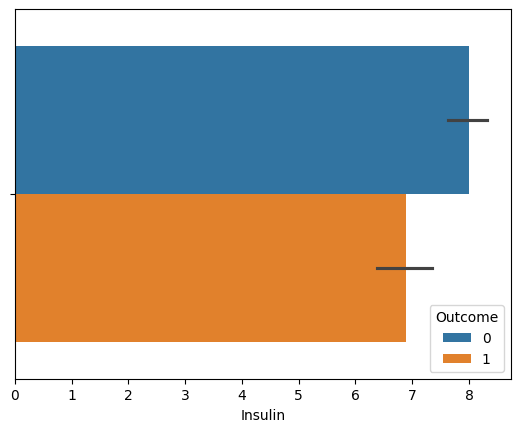

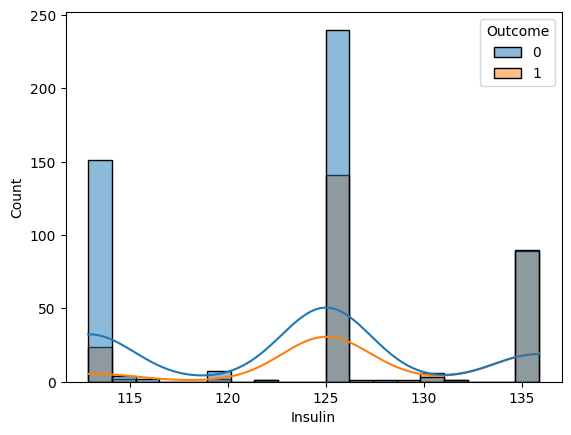

In [67]:
sns.barplot(x=df['Insulin'], y=df['Outcome'], estimator='mean')
plt.show()
sns.barplot(x=df['Insulin'], hue=df['Outcome'], estimator='std')
plt.show()
sns.histplot(x='Insulin', hue='Outcome', data = df, kde=True)
plt.show()

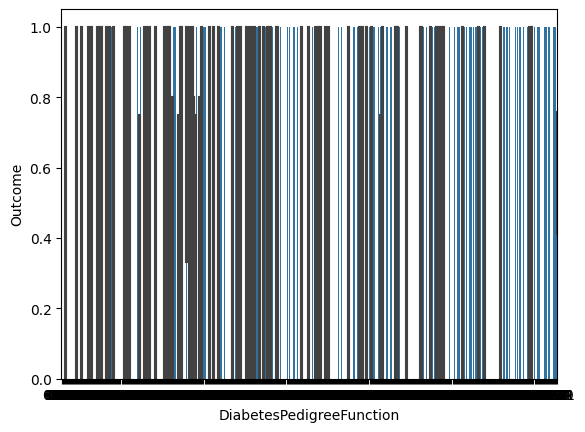

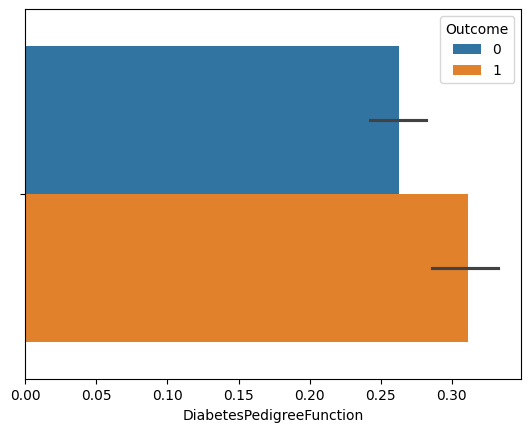

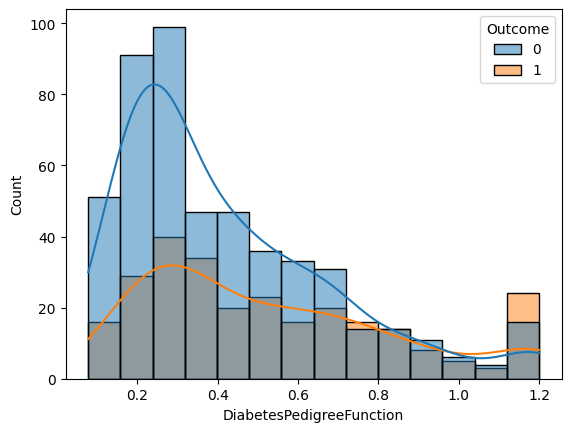

In [68]:
sns.barplot(x=df['DiabetesPedigreeFunction'], y=df['Outcome'], estimator='mean')
plt.show()
sns.barplot(x=df['DiabetesPedigreeFunction'], hue=df['Outcome'], estimator='std')
plt.show()
sns.histplot(x='DiabetesPedigreeFunction', hue='Outcome', data = df, kde=True)
plt.show()

In [71]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols_to_scale = ["Pregnancies","Age","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction"]
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.444444,0.670968,0.50000,0.732143,0.527174,0.480499,0.489305,0.637363,1
1,0.074074,0.264516,0.40625,0.517857,0.527174,0.262090,0.243316,0.219780,0
2,0.592593,0.896774,0.37500,0.517857,0.527174,0.159126,0.529412,0.241758,1
3,0.074074,0.290323,0.40625,0.303571,0.000000,0.308892,0.079323,0.000000,0
4,0.000000,0.600000,0.00000,0.732143,1.000000,0.776911,1.000000,0.263736,1


In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df.drop(columns='Outcome')
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45, stratify=y)

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy Score train: ", accuracy_score(y_train, y_pred_train))

y_pred_test = lr.predict(X_test)
print("Accuracy Score test: ", accuracy_score(y_test, y_pred_test))

Accuracy Score train:  0.776536312849162
Accuracy Score test:  0.7792207792207793


In [78]:
confusion_matrix(y_train, y_pred_train)

array([[313,  37],
       [ 83, 104]])

In [79]:
confusion_matrix(y_test, y_pred_test)

array([[137,  13],
       [ 38,  43]])

In [83]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       150
           1       0.77      0.53      0.63        81

    accuracy                           0.78       231
   macro avg       0.78      0.72      0.74       231
weighted avg       0.78      0.78      0.77       231



In [84]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       350
           1       0.74      0.56      0.63       187

    accuracy                           0.78       537
   macro avg       0.76      0.73      0.74       537
weighted avg       0.77      0.78      0.77       537

